# Introduction
"""
# Phân tích Dữ liệu Thăm dò (EDA)

**Giới thiệu**: 
Bộ dữ liệu "Phân loại Khả năng Thuê của Hơn 70,000 Ứng viên" chứa một tập hợp thông tin toàn diện về các ứng viên và điểm khả năng thuê tương ứng của họ. Bộ dữ liệu này được xây dựng nhằm hỗ trợ các tổ chức và nhà tuyển dụng trong việc đánh giá mức độ phù hợp của các ứng viên cho các cơ hội việc làm khác nhau.

## Mục tiêu:
Phân tích dữ liệu nhằm khám phá các yếu tố ảnh hưởng đến khả năng được tuyển dụng và tăng cường hiệu quả của quá trình tuyển dụng.

## Thông tin Dữ liệu:
- Tuổi: tuổi của ứng viên, >35 tuổi hoặc <35 tuổi (dữ liệu phân loại)
- Trình độ học vấn: trình độ học vấn của ứng viên (Cử nhân, Thạc sĩ, Tiến sĩ…) (dữ liệu phân loại)
- Giới tính: giới tính của ứng viên, (Nam, Nữ hoặc Không xác định) (dữ liệu phân loại)
- MainBranch: liệu ứng viên có phải là lập trình viên chuyên nghiệp hay không (dữ liệu phân loại)
- Số năm lập trình: thời gian ứng viên đã lập trình (số nguyên)
- Số năm lập trình chuyên nghiệp: thời gian ứng viên đã lập trình trong bối cảnh chuyên nghiệp (số nguyên)
- Lương trước đây: mức lương của công việc trước đây của ứng viên (số thực)
- Kỹ năng máy tính: số kỹ năng máy tính mà ứng viên biết (số nguyên)
- Được tuyển dụng: biến mục tiêu, liệu ứng viên đã được tuyển dụng hay chưa (dữ liệu phân loại)
"""


In [76]:
# Import các thư viện cần thiết
import cudf
import cupy as cp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append('.')


In [77]:
# Dữ liệu
"""
## 1. Dữ liệu

Trong phần này, chúng ta sẽ tải và kiểm tra bộ dữ liệu để hiểu rõ hơn về cấu trúc và nội dung của nó.
"""

# Load dữ liệu
data = pd.read_csv('../data/stackoverflow_full.csv', index_col=0)
# Hiển thị vài dòng đầu tiên của bộ dữ liệu
data.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [78]:

# Khám phá dữ liệu
"""
## 2. Khám phá dữ liệu

Chúng ta sẽ xem xét các kiểu dữ liệu, giá trị thiếu và các thống kê cơ bản để có cái nhìn tổng quan về bộ dữ liệu.
"""

# Kiểm tra các cột và kiểu dữ liệu
print("Kiểu dữ liệu của các cột:\n", data.dtypes)

Kiểu dữ liệu của các cột:
 Age                object
Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
MainBranch         object
YearsCode           int64
YearsCodePro        int64
Country            object
PreviousSalary    float64
HaveWorkedWith     object
ComputerSkills      int64
Employed            int64
dtype: object


In [79]:
# Kiểm tra giá trị thiếu
missing_values = data.isnull().sum()
print("Giá trị thiếu:\n", missing_values)

Giá trị thiếu:
 Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64


In [80]:
# Thống kê cơ bản cho các cột số
summary_stats = data.describe()
print("Thống kê cơ bản:\n", summary_stats)

Thống kê cơ bản:
          Employment     YearsCode  YearsCodePro  PreviousSalary  \
count  73462.000000  73462.000000  73462.000000    73462.000000   
mean       0.883096     14.218902      9.098377    67750.260611   
std        0.321308      9.405172      7.960201    49488.142118   
min        0.000000      0.000000      0.000000        1.000000   
25%        1.000000      7.000000      3.000000    28839.000000   
50%        1.000000     12.000000      7.000000    57588.000000   
75%        1.000000     20.000000     12.000000    95979.000000   
max        1.000000     50.000000     50.000000   224000.000000   

       ComputerSkills      Employed  
count    73462.000000  73462.000000  
mean        13.428221      0.536223  
std          7.057835      0.498690  
min          0.000000      0.000000  
25%          8.000000      0.000000  
50%         13.000000      1.000000  
75%         17.000000      1.000000  
max        107.000000      1.000000  


# Phân tích các đặc điểm chính

In [81]:
"""
## 3. Phân tích các đặc điểm chính

Trong phần này, chúng ta sẽ phân tích các đặc điểm phân loại và số để hiểu rõ hơn về phân bố của chúng.
"""

# Xác định các cột phân loại và số
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
numerical_columns = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]

print("Các cột phân loại:\n", categorical_columns)
print("Các cột số:\n", numerical_columns)

Các cột phân loại:
 ['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Country', 'HaveWorkedWith']
Các cột số:
 ['Employment', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills', 'Employed']


In [85]:
data.drop(categorical_columns, axis=1)

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
0,1,7,4,51552.0,4,0
1,1,12,5,46482.0,12,1
2,1,15,6,77290.0,7,0
3,1,9,6,46135.0,13,0
4,0,40,30,160932.0,2,0
...,...,...,...,...,...,...
73457,1,7,2,41058.0,13,1
73458,1,21,16,115000.0,11,1
73459,1,4,3,57720.0,12,1
73460,1,5,1,70000.0,15,1


: 

In [47]:
# Phân tích giá trị duy nhất trong các cột phân loại
for col in categorical_columns:
    print(f"Số lượng giá trị duy nhất trong cột {col}: {data[col].nunique()}")
    print(f"Các giá trị phổ biến trong cột {col}:\n{data[col].value_counts().head()}")


Số lượng giá trị duy nhất trong cột Age: 2
Các giá trị phổ biến trong cột Age:
Age
<35    47819
>35    25643
Name: count, dtype: int64
Số lượng giá trị duy nhất trong cột Accessibility: 2
Các giá trị phổ biến trong cột Accessibility:
Accessibility
No     71355
Yes     2107
Name: count, dtype: int64
Số lượng giá trị duy nhất trong cột EdLevel: 5
Các giá trị phổ biến trong cột EdLevel:
EdLevel
Undergraduate    37402
Master           18903
Other            10843
NoHigherEd        3706
PhD               2608
Name: count, dtype: int64
Số lượng giá trị duy nhất trong cột Gender: 3
Các giá trị phổ biến trong cột Gender:
Gender
Man          68573
Woman         3518
NonBinary     1371
Name: count, dtype: int64
Số lượng giá trị duy nhất trong cột MentalHealth: 2
Các giá trị phổ biến trong cột MentalHealth:
MentalHealth
No     56944
Yes    16518
Name: count, dtype: int64
Số lượng giá trị duy nhất trong cột MainBranch: 2
Các giá trị phổ biến trong cột MainBranch:
MainBranch
Dev       67396
NotDev 

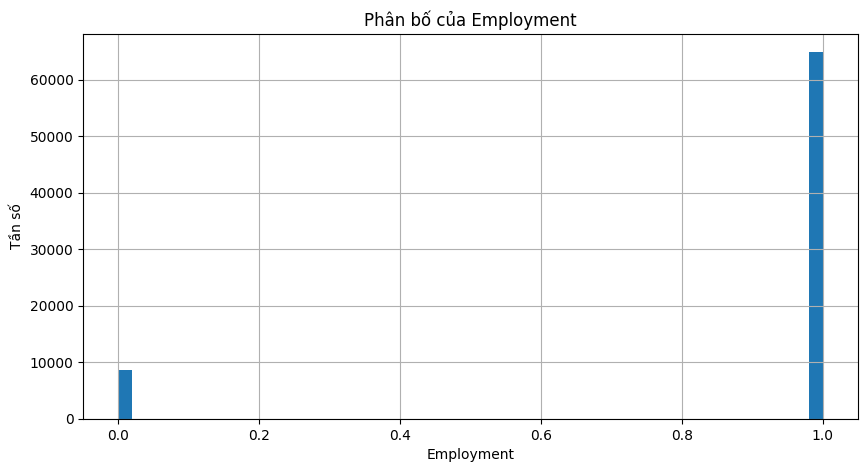

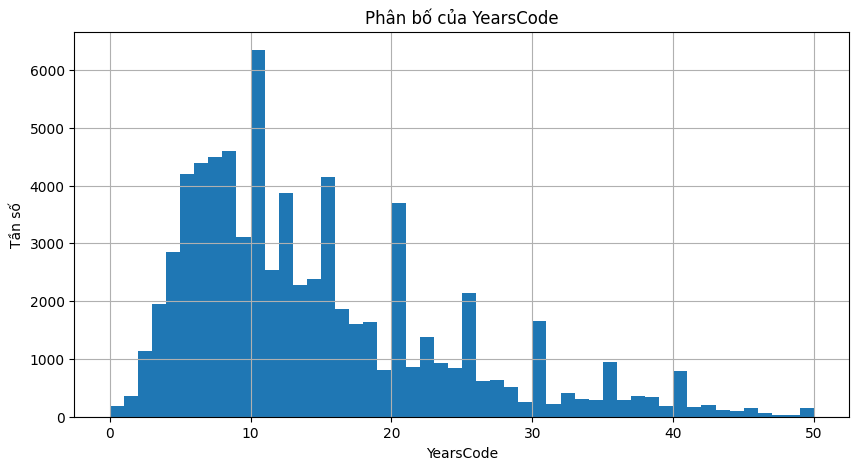

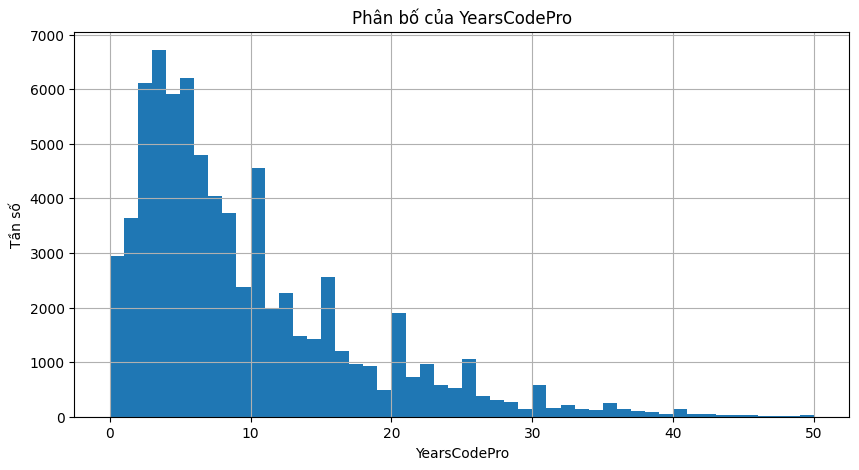

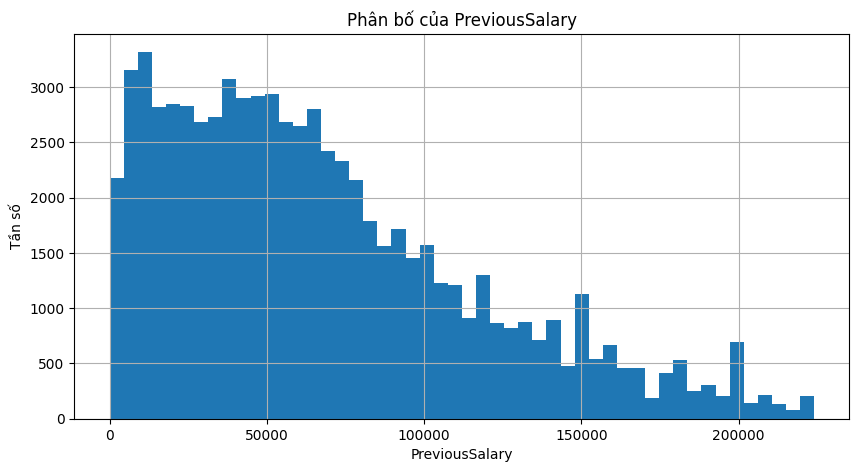

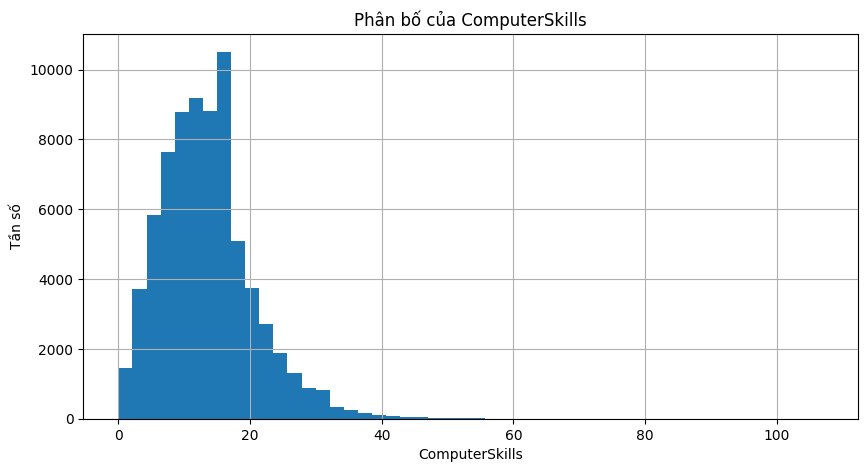

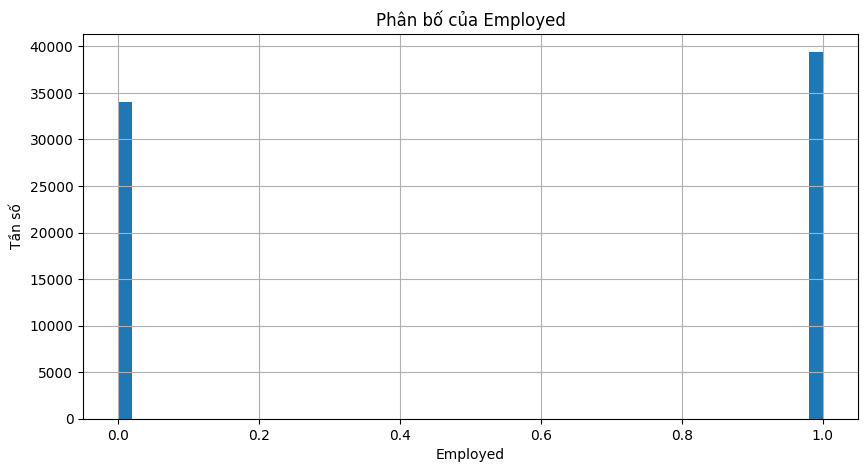

In [48]:
# Phân tích phân bố của các đặc điểm số
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    data[col].hist(bins=50)
    plt.title(f"Phân bố của {col}")
    plt.xlabel(col)
    plt.ylabel("Tần số")
    plt.show()

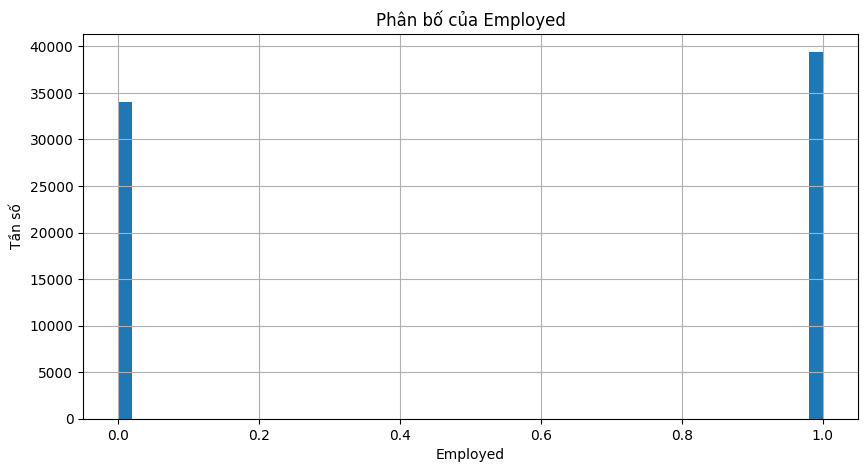

In [49]:
# Phân tích biến mục tiêu
"""
## 4. Phân tích biến mục tiêu

Chúng ta sẽ kiểm tra phân bố của biến mục tiêu để hiểu rõ hơn về khả năng được tuyển dụng.
"""

target_column = 'Employed'  # Thay thế bằng tên của cột mục tiêu nếu khác
if target_column in categorical_columns:
    print(f"Phân bố của biến mục tiêu {target_column}:")
    print(data[target_column].value_counts())
else:
    plt.figure(figsize=(10, 5))
    data[target_column].hist(bins=50)
    plt.title(f"Phân bố của {target_column}")
    plt.xlabel(target_column)
    plt.ylabel("Tần số")
    plt.show()

# Phân tích tương quan


In [50]:
"""
## 5. Phân tích tương quan

Chúng ta sẽ tính toán ma trận tương quan cho các đặc điểm số để xem liệu có mối tương quan nào mạnh mẽ giữa các đặc điểm này với nhau hoặc với biến mục tiêu.
"""

# Tính toán ma trận tương quan cho các cột số
correlation_matrix = data[numerical_columns].corr()

# Hiển thị ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan")
plt.show()




# Kết luận ban đầu
"""
## 6. Kết luận ban đầu

Sau khi phân tích dữ liệu ban đầu, chúng ta đã có những cái nhìn sơ bộ về bộ dữ liệu, các đặc điểm chính và mối tương quan giữa các biến. Những phát hiện này sẽ giúp định hướng các bước tiền xử lý dữ liệu và mô hình hóa sau này.
"""

# Xử lý dữ liệu

In [54]:
data.head()

,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Age_>35,Accessibility_Yes,EdLevel_NoHigherEd,EdLevel_Other,...,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,7,4,51552.0,C++;Python;Git;PostgreSQL,4,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12,5,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,15,6,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9,6,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,40,30,160932.0,C++;Python,2,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:




df.dropna(inplace=True)



# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 
                                     'MentalHealth', 'MainBranch', 'Country'], drop_first=True)

# Convert 'Employed' to binary
data['Employed'] = data['Employed'].apply(lambda x: 1 if x == '1' else 0)

# Split and process 'HaveWorkedWith' and 'ComputerSkills' columns
skills_columns = data['HaveWorkedWith'].str.get_dummies(sep=';')
computer_skills_columns = data['ComputerSkills'].astype(str).str.get_dummies(sep=';')

# Combine the new skill columns with the original data
data = pd.concat([data, skills_columns, computer_skills_columns], axis=1)

# Drop the original 'HaveWorkedWith' and 'ComputerSkills' columns
data = data.drop(columns=['HaveWorkedWith', 'ComputerSkills'])


TypeError: 'csr_matrix' object is not callable

In [56]:
data.head()

,YearsCode,YearsCodePro,PreviousSalary,Employed,Age_>35,Accessibility_Yes,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,...,65,67,68,7,78,79,8,9,90,91
0,7,4,51552.0,0,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,12,5,46482.0,0,False,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
2,15,6,77290.0,0,False,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0
3,9,6,46135.0,0,False,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
4,40,30,160932.0,0,True,False,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
